   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


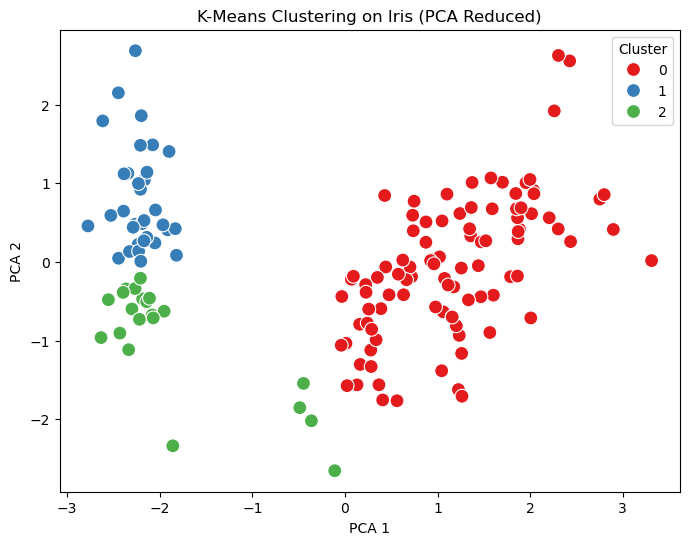

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 

 

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names
 
# Create a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())
 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 

# Apply KMeans clustering (we know there are 3 clusters in Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
 
# Add cluster labels to DataFrame
df['Cluster'] = kmeans.labels_
 

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
 
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette="Set1", s=100)
plt.title("K-Means Clustering on Iris (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()